<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><FONT FACE="times new roman" SIZE=5>
<br>
<i><b>Docente:</b></i> Jhon Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> HPC
<br>
<i><b>Tema:</b></i> Parcial tercer corte
<br>
<i><b>Estudiante</b></i> 
  <li>Hugo Andres Espinosa</li>
<br>
23/11/22
<br>
</FONT>
</div>

# **Análisis de los datos:**

##Importar las bibliotecas

In [33]:
import pandas as pd                   
import numpy as np                    
import seaborn as sns                
import matplotlib.pyplot as plt      

##Cargar el dataset

In [34]:
df=pd.read_csv('https://raw.githubusercontent.com/HugoEspiG/HPC/main/ParcialFinal/CarPrice_Assignment.csv')

##Mostrar los datos

In [35]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
# Se procede a realizar un RESUMEN ESTADÍSTICO DE LOS DATOS:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##Modificar el dataset con solo cuatro columnas

In [37]:
# El dataframe presenta 26 columnas en total, y 205 filas.

# De esas 25 columnas se tiene 11 features y 1 variable dependiente


# Como se evidencia en el cuadro anterior, hay 205 filas en el dataset
# y por cada columna existen 205 datos NON - NULL , es decir no nulos, por 
# tanto el dataframe no presenta valores nulos o desaparecidos. Lo que indica 
# que NO es necesario realizar algún tratamiento de datos para la adecuación de 
# la data.

# El dataframe está en buenas condiciones para su uso,sin embargo debera ser acortado
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [38]:
df=df.drop(columns=['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carheight', 'enginetype',
       'cylindernumber',  'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'highwaympg'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carwidth    205 non-null    float64
 1   curbweight  205 non-null    int64  
 2   enginesize  205 non-null    int64  
 3   horsepower  205 non-null    int64  
 4   price       205 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 8.1 KB


##Borrar datos nulos

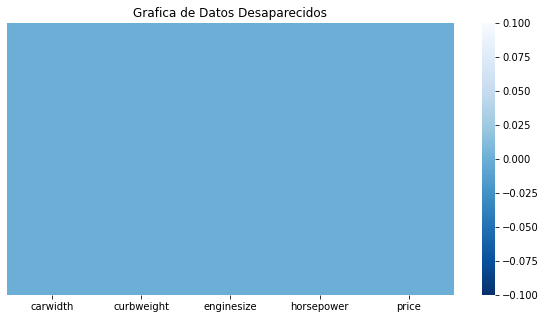

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap='Blues_r')
plt.title("Grafica de Datos Desaparecidos")
plt.show()

In [40]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carwidth    205 non-null    float64
 1   curbweight  205 non-null    int64  
 2   enginesize  205 non-null    int64  
 3   horsepower  205 non-null    int64  
 4   price       205 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 9.6 KB


##Graficar relación entre variables

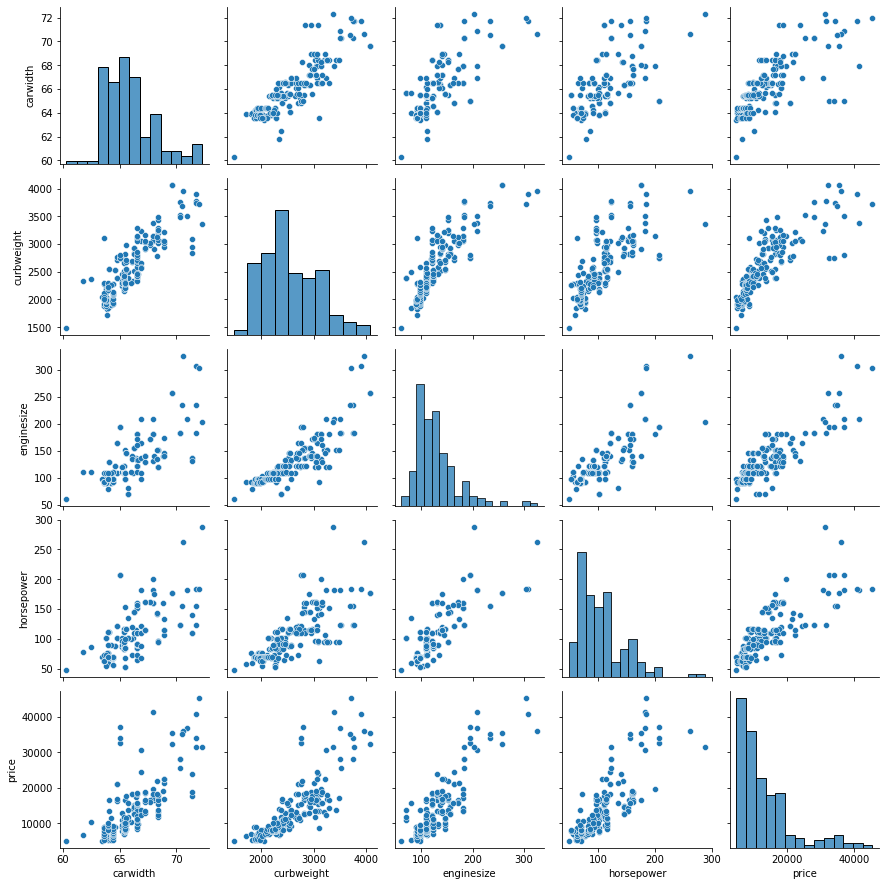

In [41]:
sns.pairplot(df)


##Hallar la correlación entre los datos, para saber que tan relacionados se encuentran

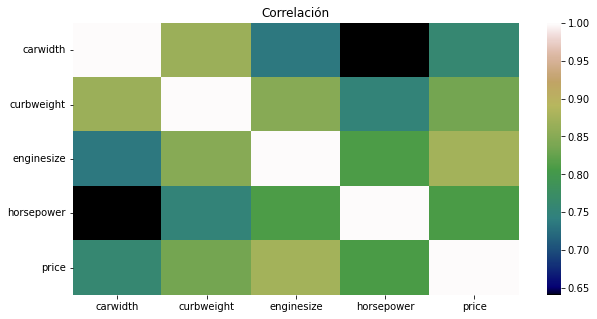

In [42]:
# se realiza la MATRIZ DE CORRELACION ;  la cual muestra la relación entre todas las variables
# tanto dependientes como independientes.
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='gist_earth')
plt.title("Correlación")
plt.show()

# **Generar modelo de regresión lineal**

##Hallar promedio de los datos

imagen.png

In [43]:
# Se enfocará en analizar las medidas consideradas mas importantes de las presentadas anteriormente
# que son la media (mean) y la desviación estándar (std)
promedio=df.mean()
promedio

carwidth         65.907805
curbweight     2555.565854
enginesize      126.907317
horsepower      104.117073
price         13276.710571
dtype: float64

##Hallar la desviación estándar

imagen.png

In [44]:
desviacion_estandar=df.std()
desviacion_estandar

carwidth         2.145204
curbweight     520.680204
enginesize      41.642693
horsepower      39.544167
price         7988.852332
dtype: float64

## Normalizar los datos

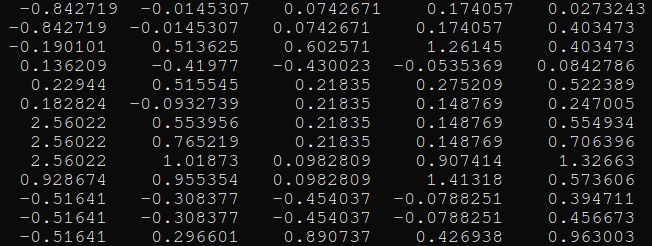

In [45]:
#Se importa la libreria para hacer la normalizacion de los datos
import scipy.stats as stats
df=stats.zscore(df)
print(df)

     carwidth  curbweight  enginesize  horsepower     price
0   -0.844782   -0.014566    0.074449    0.174483  0.027391
1   -0.844782   -0.014566    0.074449    0.174483  0.404461
2   -0.190566    0.514882    0.604046    1.264536  0.404461
3    0.136542   -0.420797   -0.431076   -0.053668  0.084485
4    0.230001    0.516807    0.218885    0.275883  0.523668
..        ...         ...         ...         ...       ...
200  1.398245    0.763241    0.339248    0.250533  0.447752
201  1.351515    0.949992    0.339248    1.416637  0.723810
202  1.398245    0.878757    1.109571    0.757535  1.029983
203  1.398245    1.273437    0.435538    0.047732  1.153582
204  1.398245    0.975021    0.339248    0.250533  1.173031

[205 rows x 5 columns]


##Dividir los datos en entrenamiento y prueba

In [46]:
df.columns

Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'price'], dtype='object')

In [47]:
# A continuación se separa las variables dependientes de las variables independientes
# Variable independiente: 
X=np.array(df[['carwidth', 'curbweight', 'enginesize', 'horsepower']])
# Variable dependiente: 
y=np.array(df[['price']])

In [48]:
# Se hacen los grupos para entrenamiento y prueba
tamaño = 0.20

porcentaje = int(X.shape[0]*(1-tamaño))

X_train = X[0:porcentaje,]
X_test  = X[porcentaje:,]

y_train = y[0:porcentaje,]
y_test  = y[porcentaje:,]

train_x = np.array(X_train)
train_y = np.array(y_train)
test_x = np.array(X_test)
test_y = np.array(y_test)

##Ajustar y evaluar el modelo 

In [49]:
#A continuacion se entrena el modelo, (similar a lo elaborado en C++."Modelo artesanal de regresión lineal").
from sklearn.linear_model import SGDRegressor
modelR = SGDRegressor(alpha=0.001,max_iter=1000)
modelR.fit(train_x, train_y.ravel())
m= modelR.coef_
b=modelR.intercept_
y_pred=modelR.predict(test_x)



In [50]:
# Se procede a mostrar el vector con los coeficientes:
print("Coeficientes",m,b)

Coeficientes [0.14194626 0.19383637 0.37864851 0.2973299 ] [0.04172406]


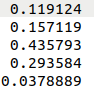

In [51]:
print("Coeficiente de determinación train: ", modelR.score(train_x, train_y))
print("Coeficiente de determinación test: ", modelR.score(test_x, test_y))

Coeficiente de determinación train:  0.8406956795287596
Coeficiente de determinación test:  0.40590819001762435


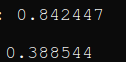

##Graficar el modelo obtenido de cada característica

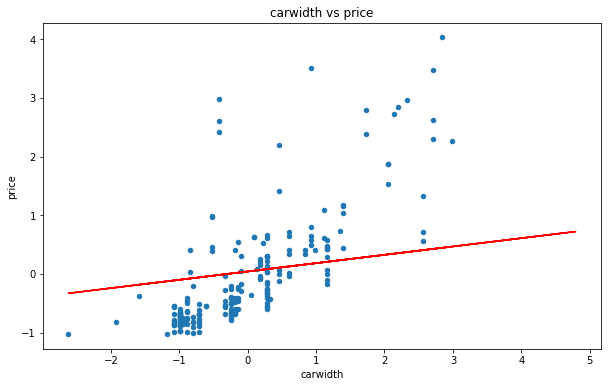

In [52]:
b=modelR.intercept_[0]
m=modelR.coef_[0]
df.plot(kind='scatter',x='carwidth',y='price',figsize= (10,6))
plt.title('carwidth vs price')
plt.plot(X,(m*X)+b,'r')
plt.show()

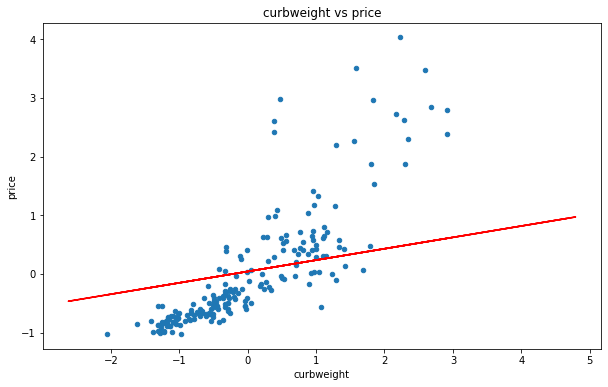

In [53]:
b=modelR.intercept_[0]
m=modelR.coef_[1]
df.plot(kind='scatter',x='curbweight',y='price',figsize= (10,6))
plt.title('curbweight vs price')
plt.plot(X,(m*X)+b,'r')
plt.show()

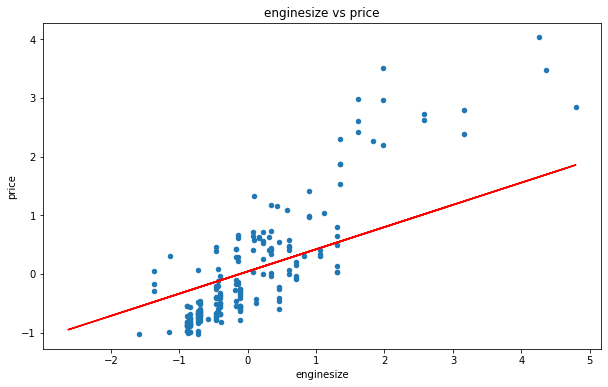

In [54]:
b=modelR.intercept_[0]
m=modelR.coef_[2]
df.plot(kind='scatter',x='enginesize',y='price',figsize= (10,6))
plt.title('enginesize vs price')
plt.plot(X,(m*X)+b,'r')
plt.show()

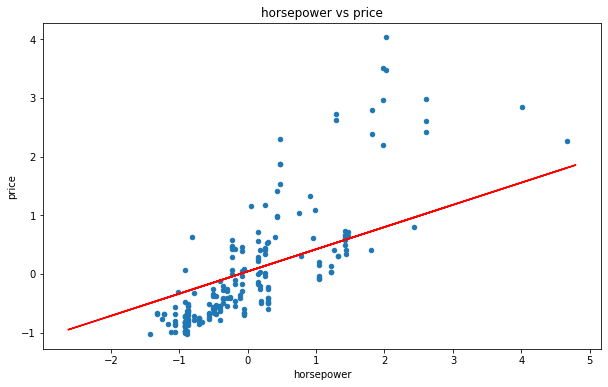

In [55]:
b=modelR.intercept_[0]
m=modelR.coef_[2]
df.plot(kind='scatter',x='horsepower',y='price',figsize= (10,6))
plt.title('horsepower vs price')
plt.plot(X,(m*X)+b,'r')
plt.show()

#**Conclusiones:** 

*  El dataset tiene 3 columnas que son las variables X ('carwidth', 'curbweight', 'enginesize', 'horsepower') y la ultima es la variable y (price).
*  El dataset no tiene valores nulos
*  La columna con mayor correlación con respecto a la columna de price, es enginesize
*  Se observa en las gŕaficas que los datos se ajustan adecuadamente al modelo
*  La calidad del modelo es alta, ya que el R2 es del 83% para datos de prueba y 42% para datos de entrenamiento.
*  Los valores de python corresponden a los obtenidos en C++.




#**Nota**

Los resultados obtenidos en el modelo de c++ se pueden encontrar en el siguiente enlace a github:
https://github.com/HugoEspiG/HPC/tree/main/ParcialFinal

#**Referencias:**
*   Introduction to ML with Python: A guide for Data Scientists
Andreas C. Müller & Sarah Guido
Published by O’Reilly Media, Inc.
©2009 | O’Reilly
* scikit Learn - 
Stochastic Gradient Descent. Recuperado 08 de noviembre de 2022, de https://www.tutorialspoint.com/scikit_learn/scikit_learn_stochastic_gradient_descent.htm 

*  sklearn.linear_model.SGDRegressor.  scikit-learn. Recuperado 08 de noviembre de 2022, de https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

